In [1]:
import numpy as np
from matplotlib import pyplot as plt
import nltk
%matplotlib inline

In [1]:
!ls logs

ce_result_25kvocab160kit600decrnn.npy
ce_result_25kvocab160kit.npy
kld_result_npy_25kvocab160kit600decrnn.npy
kld_result_npy_25kvocab160kit.npy


In [3]:
kld = np.load('logs/kld_result_npy_25kvocab160kit600decrnn.npy')
ce = np.load('logs/ce_result_25kvocab160kit600decrnn.npy')

(0, 100)

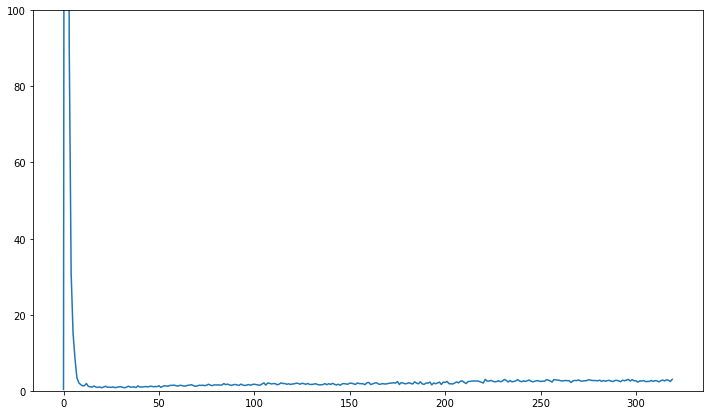

In [4]:
X = np.arange(kld.shape[0])
plt.figure(figsize=(12,7))
plt.plot(X, kld)
plt.ylim((0,100))

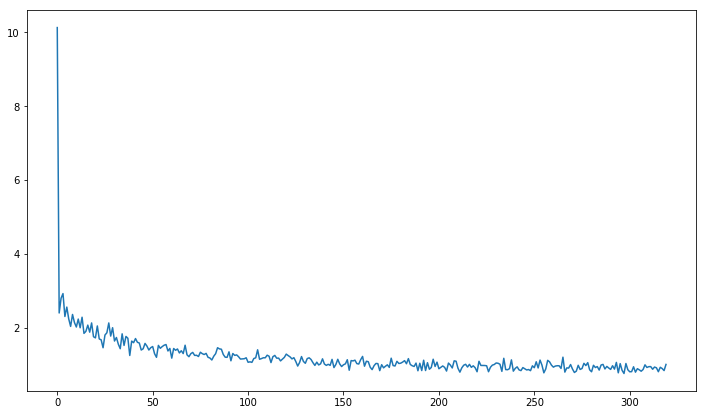

In [5]:
X = np.arange(ce.shape[0])
plt.figure(figsize=(12,7))
plt.plot(X, ce)

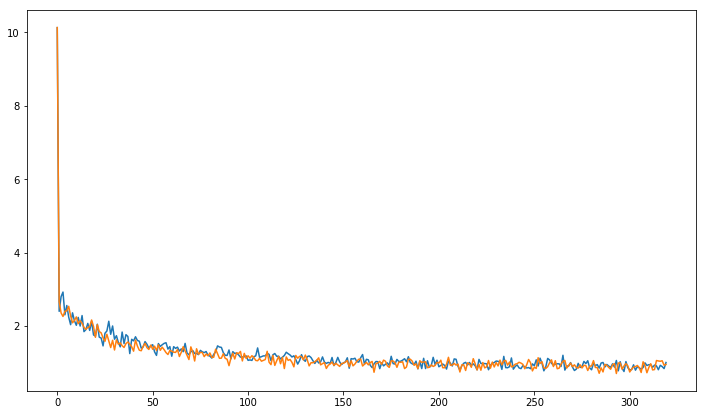

In [11]:
ce1 = np.load('logs/ce_result_25kvocab160kit600decrnn.npy')
ce2 = np.load('logs/ce_result_25kvocab160kit.npy')
X = np.arange(ce1.shape[0])
plt.figure(figsize=(12,7))
plt.plot(X, ce1)
plt.plot(X, ce2)


In [10]:
np.min(ce[-100:])

0.75627357

In [4]:
DATASETS = ['snli_test', 'quora_test', 'mscoco_test']
def build_ce_plot(model_name, need_bleu=False, old_version=False, logs=None):
    if old_version:
        valid = np.load('logs/ce_result_{}.npy'.format(model_name))
    else:
        train = np.load('logs/ce_result_train_{}.npy'.format(model_name))
        valid = np.load('logs/ce_result_valid_{}.npy'.format(model_name))
    X = np.arange(valid.shape[0])
    plt.figure(figsize=(12,7))
    plt.grid(True)
    if not old_version:
        plt.plot(X, train, color='red', label='train')
    plt.plot(X, valid, color='green', label='validation')
    plt.ylim([0,3])
    plt.legend(loc='best')
    plt.show()
    if old_version:
        print(np.mean(valid[-20:]))
    else:
        print(np.mean(train[-20:]), np.mean(valid[-20:]))
    if need_bleu:
        bleu = get_bleu(model_name, logs)
        print('BLEU:')
        for i, ds in enumerate(DATASETS):
            print('{} : {}'.format(ds, bleu[i]))

def get_bleu(model_name, logs=None):
    if not logs is None:
        model_name = logs
    result = []
    for dataset in DATASETS:
        target = np.load('logs/target_out_{}_{}.txt.npy'.format(dataset, model_name))
        sampled = np.load('logs/sampled_out_{}_{}.txt.npy'.format(dataset, model_name))
        sampled = [s.split() for s in sampled]
        sampled_list = [[s] for s in sampled]
        result.append(nltk.translate.bleu_score.corpus_bleu(list_of_references=sampled_list, hypotheses=target))
    return result

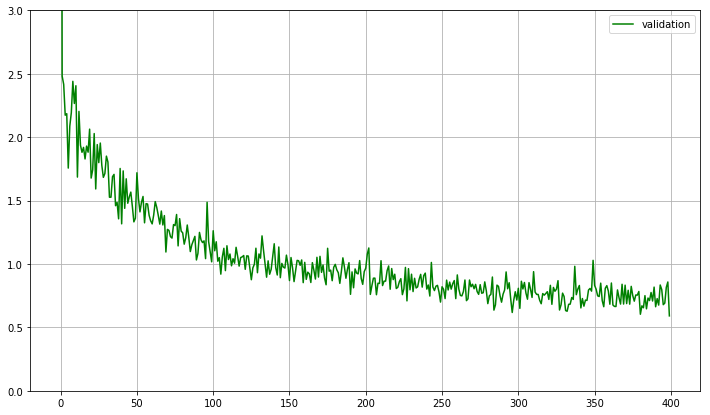

0.72000104
BLEU: 0.34492260761445054


In [55]:
build_ce_plot('snli_quora_200k_800rnn', old_version=True,  need_bleu=True, logs='likely_snli_quora_200k_800rnn')

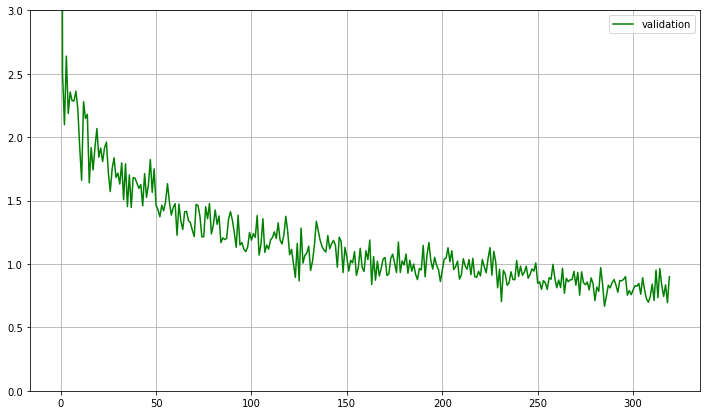

0.8060557


In [52]:
build_ce_plot('snli_quora_160k', old_version=True)

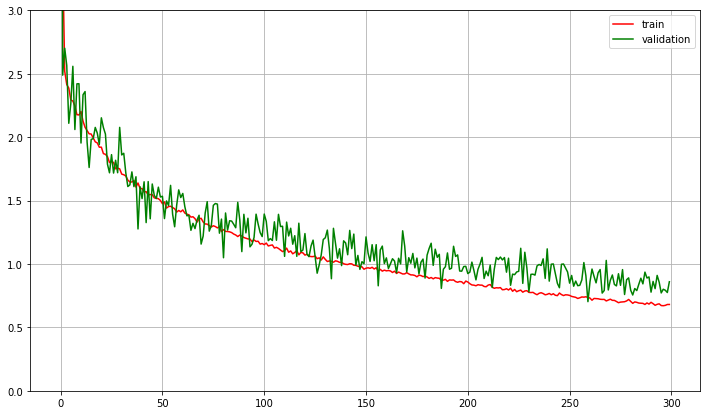

0.6862521 0.8324913
BLEU: 0.29395457639529404


In [57]:
build_ce_plot('snli_quora_150k_600rnn',  need_bleu=True)

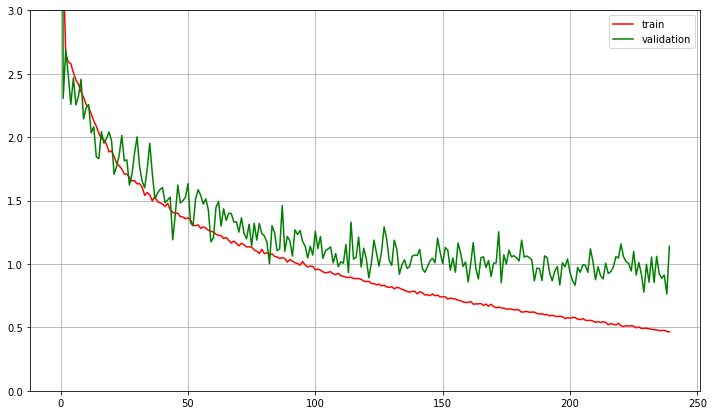

0.49189228 0.9676285
BLEU: 0.2955337574640947


In [58]:
build_ce_plot('quoraonly120kit600decrnn', need_bleu=True) # 800 - 800

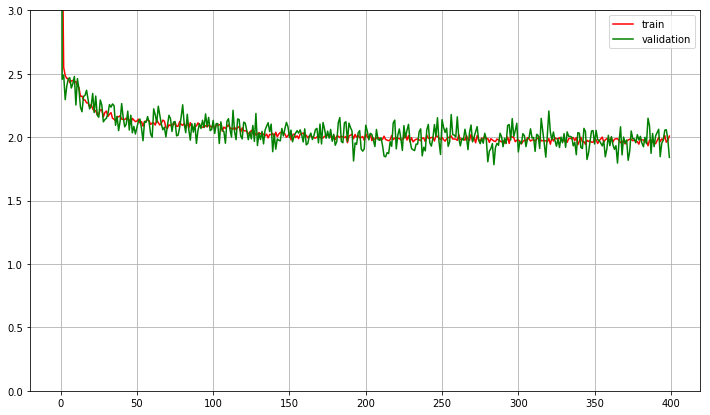

1.9735352 1.9853957


In [36]:
build_ce_plot('snli_quora_wd_01_200k800_800') # 800 - 800

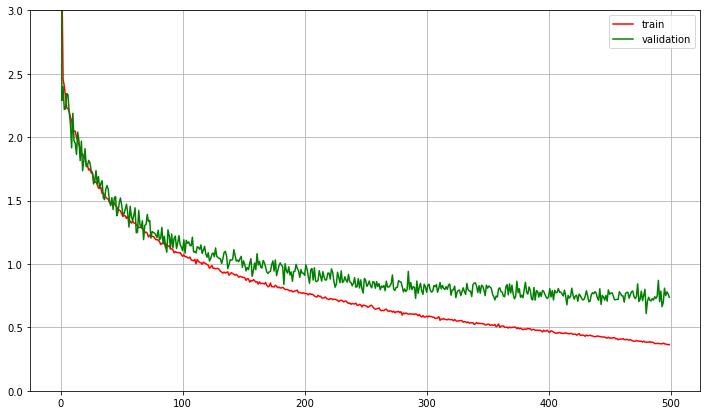

0.37483498 0.734522
BLEU: 0.3366883062951258


In [47]:
build_ce_plot('snli_quora_250k_600_800rnn', need_bleu=True)

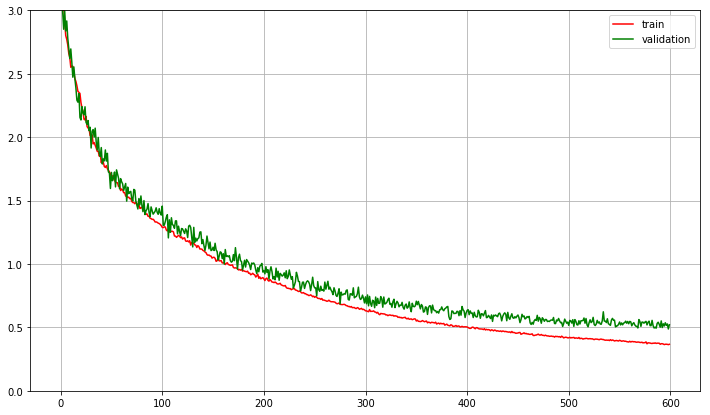

0.37125534 0.5179926


In [59]:
build_ce_plot('mscoco_300kit_600_800')  

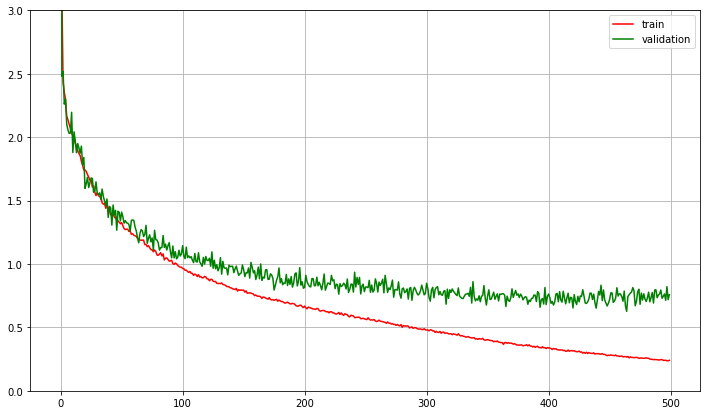

0.24584314 0.7502717
BLEU: 0.34931982519358146


In [60]:
build_ce_plot('snli_quora_250k800_1100', need_bleu=True)

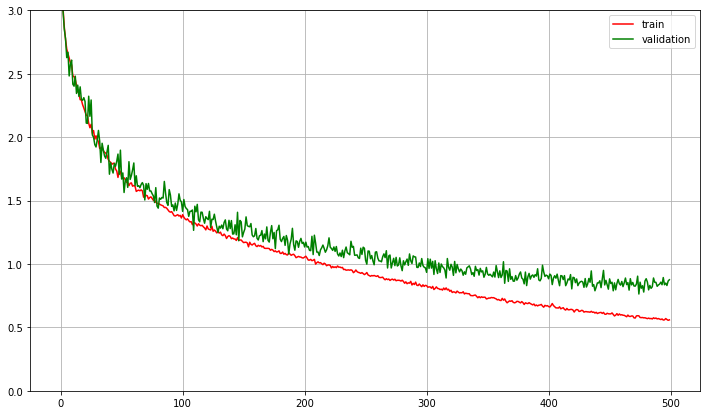

0.56666386 0.84680206
BLEU: 0.35977854040897983


In [62]:
build_ce_plot('quora_coco_250kit_600_800', need_bleu=True)

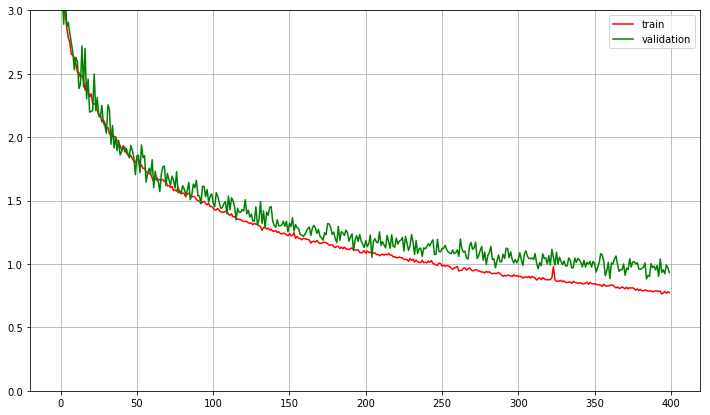

0.7836236 0.95698154
BLEU: 0.3275098509152493


In [64]:
build_ce_plot('quora_coco_200kit_600_600', need_bleu=True)

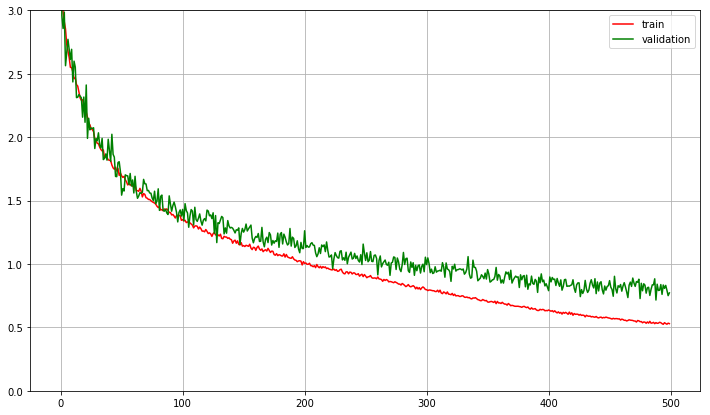

0.5341209 0.80148494
BLEU: 0.36532540141564973


In [65]:
build_ce_plot('quora_coco_250k800_800', need_bleu=True)

# New version >> 

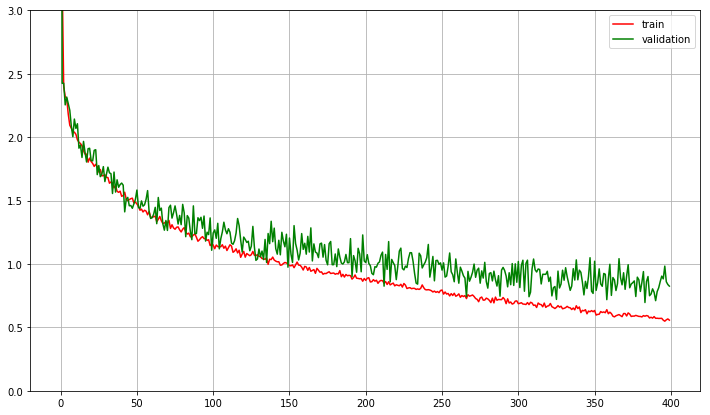

0.5744804 0.8293521
BLEU:
snli_test : 0.34917557275196415
quora_test : 0.004409578290240112
mscoco_test : 0.1286465701265278


In [5]:
build_ce_plot('snli_200kit_600_800', need_bleu=True)

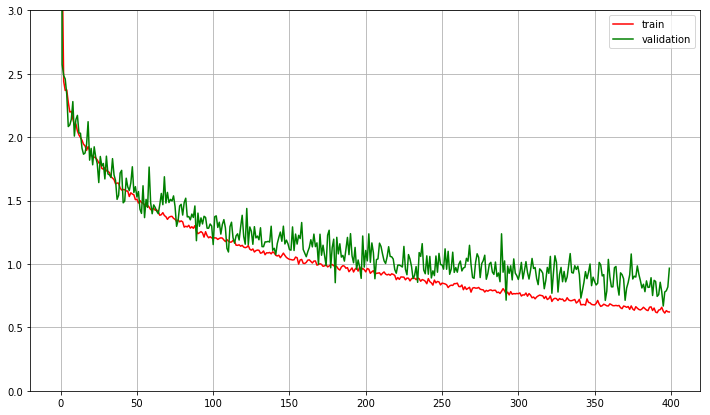

0.63761145 0.8168772
BLEU:
snli_test : 0.3153091434253763
quora_test : 0.006007862117625516
mscoco_test : 0.1334795998251953


In [6]:
build_ce_plot('snli_200k600_600', need_bleu=True)

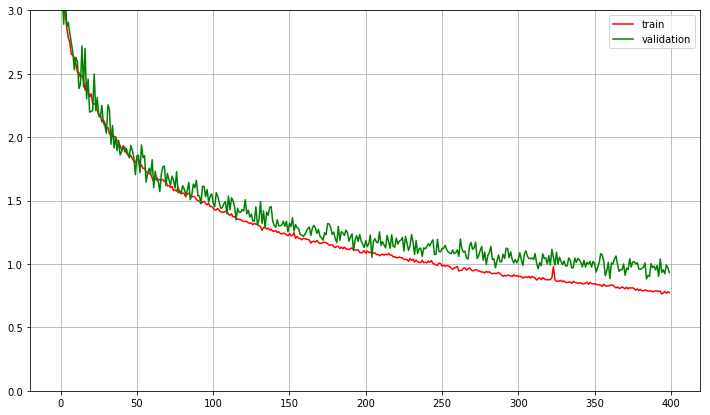

0.7836236 0.95698154
BLEU:
snli_test : 0.13436013162858976
quora_test : 0.330926936393386
mscoco_test : 0.19170905346403386


In [7]:
build_ce_plot('quora_coco_200kit_600_600', need_bleu=True)

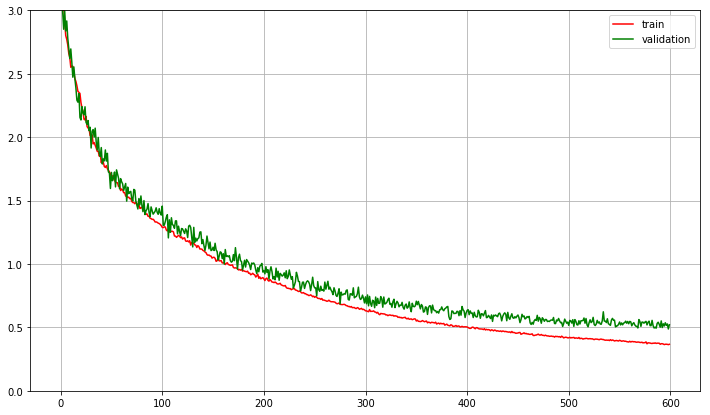

0.37125534 0.5179926
BLEU:
snli_test : 0.10799560820804018
quora_test : 0.006310914842762946
mscoco_test : 0.37662550544443035


In [8]:
build_ce_plot('mscoco_300kit_600_800', need_bleu=True)

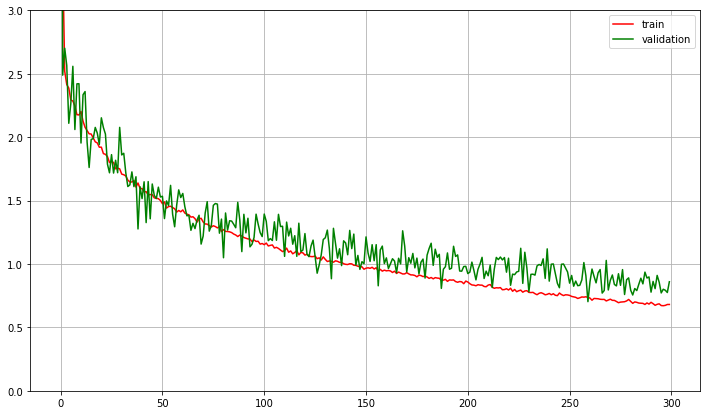

0.6862521 0.8324913
BLEU:
snli_test : 0.1972403931340118
quora_test : 0.2966383183947966
mscoco_test : 0.07218777616417398


In [9]:
build_ce_plot('snli_quora_150k_600rnn', need_bleu=True)

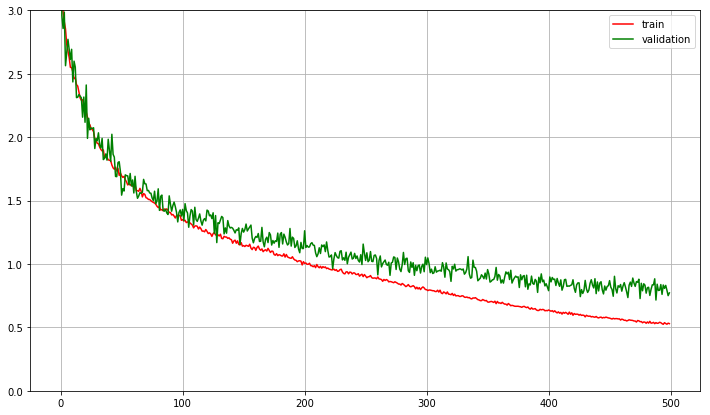

0.5341209 0.80148494
BLEU:
snli_test : 0.13975653525137524
quora_test : 0.3662575723557561
mscoco_test : 0.24962410834220874


In [10]:
build_ce_plot('quora_coco_250k800_800', need_bleu=True)

In [43]:
! ls  -l logs/ce_result*

-rw-rw-r-- 1 aleksey.zotov aleksey.zotov 1408 Apr  6 04:29 logs/ce_result_25kvocab160kit600decrnn.npy
-rw-rw-r-- 1 aleksey.zotov aleksey.zotov 1408 Apr  6 04:38 logs/ce_result_25kvocab160kit.npy
-rw-rw-r-- 1 aleksey.zotov aleksey.zotov 1408 Apr 20 19:32 logs/ce_result_snli_quora_160k.npy
-rw-rw-r-- 1 aleksey.zotov aleksey.zotov 1728 Apr 21 19:32 logs/ce_result_snli_quora_200k_800rnn.npy
-rw-rw-r-- 1 aleksey.zotov aleksey.zotov 1088 Apr 22 19:50 logs/ce_result_train_quoraonly120kit600decrnn.npy
-rw-rw-r-- 1 aleksey.zotov aleksey.zotov 1328 Apr 22 17:02 logs/ce_result_train_snli_quora_150k_600rnn.npy
-rw-rw-r-- 1 aleksey.zotov aleksey.zotov 2128 Apr 23 02:24 logs/ce_result_train_snli_quora_250k_600_800rnn.npy
-rw-rw-r-- 1 aleksey.zotov aleksey.zotov 1728 Apr 23 06:06 logs/ce_result_train_snli_quora_wd_01_200k800_800.npy
-rw-rw-r-- 1 aleksey.zotov aleksey.zotov 1088 Apr 22 19:50 logs/ce_result_valid_quoraonly120kit600decrnn.npy
-rw-rw-r-- 1 aleksey.zotov aleksey.zotov 1328 Apr 22 17:02 lo